####Making a Venn Diagram from three methods of Chimera checking

In [40]:
library(limma)
suppressMessages(library(bioUtilsr))
suppressMessages(library(Biostrings))
source("/anas/gh/splitIntoDataFrame.R")

In [41]:
fasta.file ="/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/OTU_picking/Roshan.corrected.fna"
# RD : reference and denovo
# RO : reference only
# DO : denovo only
col.names = c("RD","RO", "DO")
ch.files = c( "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/chimeras.txt",
                "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH2/chimeras.txt",
                "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH4/chimeras_modified.txt" );
names( ch.files ) = col.names;


## work around for old ids in a work arouund to fix the col names
#t = splitIntoDataFrame( ch[[ "DO" ]], header=FALSE, sep= "[.]" );
#ch[[ "DO" ]] = paste0( t[,1], ".", t[,2], "_", t[,3] );
##

In [42]:
make_matrix = function( fasta.file, ch.files ){
        fdat = readDNAStringSet(fasta.file, format="fasta", use.names=TRUE );
        uids = names( fdat );
        uids = gsub( " .*", "", uids );
        col.names = names( ch.files );
        n.col.names = length( col.names );
        rv = matrix( 0, nrow=length(uids), ncol=length(col.names ), dimnames=list(uids,col.names) );
        ch = sapply( ch.files, readLines );
        for( x in col.names ) {
                if( any( !( ch[[ x ]] %in% rownames( rv ) ) ) ){
                        nmiss = length( ch[[ x ]][ !( ch[[ x ]] %in% rownames( rv ) ) ] ) > 0;
                        message( "Missing " , nmiss, " from ", x );
                }
        rv[ ch[[ x ]], x ] = 1;
        }
    return(rv)
    }

In [80]:
mat = make_matrix(fasta.file, ch.files)
rv = vennCounts(mat)
head(mat)

,RD,RO,DO
HFD.1_1,0,0,0
HFD.1_2,0,0,0
HFD.1_3,1,1,1
HFD.1_4,1,1,1
HFD.1_5,0,0,0
HFD.1_6,0,0,0


In [72]:
length(rownames( mat[ mat[,2]==0 & mat[,2] == 0 & mat[,3]==0, ] ) )
length(rownames( mat[ mat[,1]==0 & mat[,2] == 1 & mat[,3]==1, ] ) )

[1] 872963

[1] 13795

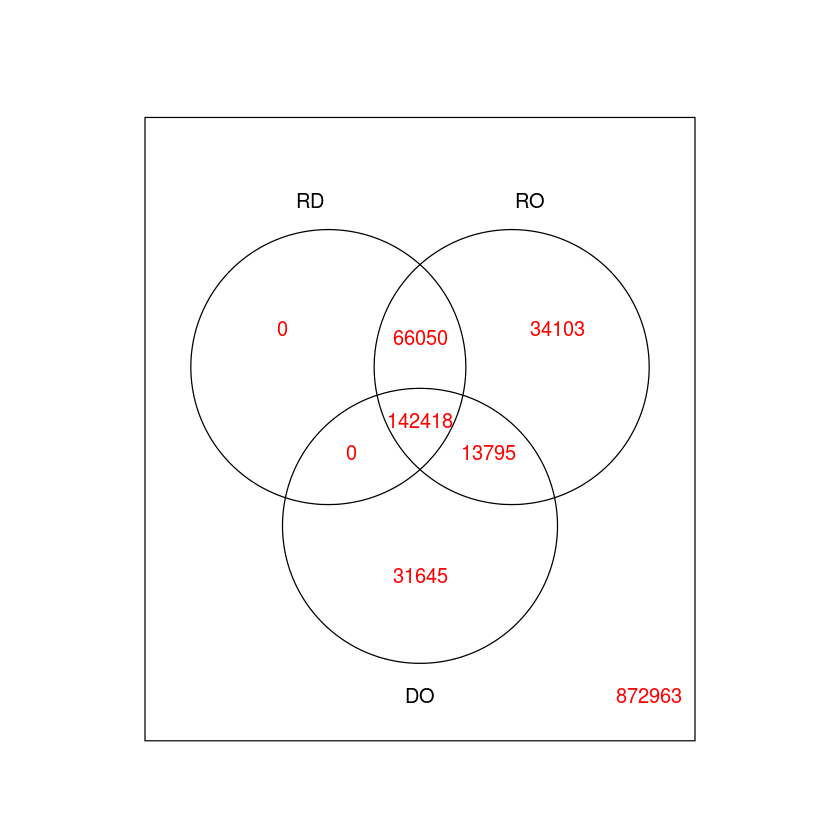

In [81]:
# vennDiagram
#
vennDiagram(rv,
names = colnames(mat), 
cex = 1, counts.col = "red",
           include="up")

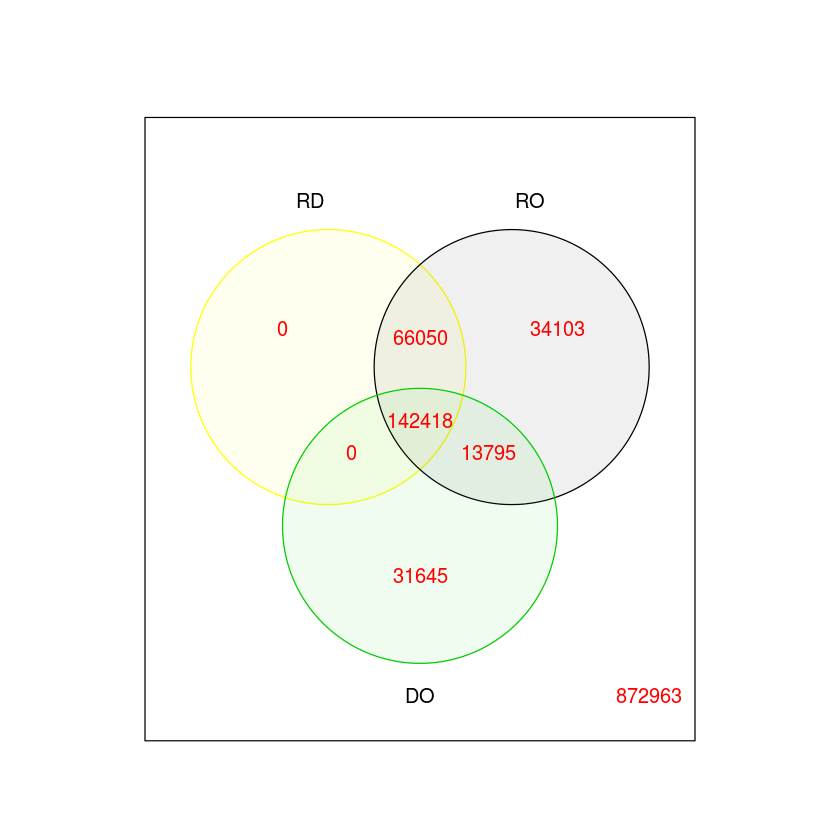

In [93]:
vennDiagram(rv,
            names = colnames(mat),
            cex = 1,
            counts.col ="red", 
            circle.col=sample(palette())[1:3]
           )